In [2]:
import os
import caesar
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import modules as anal
import modules.anal_func as anal_func

from astropy.cosmology import LambdaCDM
import astropy.units as u
from astropy.io import fits
from scipy import interpolate

from modules.powdermod.makesed import MakeSED

import yt

cosmo = LambdaCDM(H0 = 68, Om0= 0.3, Ode0= 0.7, Ob0=0.048)
plt.rcParams.update({'font.size': 28})

sb = anal.Simba('PC39BP4', size=100)

In [3]:
subset = '/home/lorenzong/analize_simba_cgm/output/hdf5/filtered_part_files/snap_129/particles_within_aperture.h5'
#subset = '/media/lorenzong/Data1/simba_hig_res/snap_m25n512_129.hdf5' 
ds = yt.load(subset)

yt : [INFO     ] 2024-08-24 18:55:18,232 Calculating time from 7.114e-01 to be 2.969e+17 seconds
yt : [INFO     ] 2024-08-24 18:55:18,232 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-08-24 18:55:18,268 Parameters: current_time              = 2.968791388457766e+17 s
yt : [INFO     ] 2024-08-24 18:55:18,268 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-08-24 18:55:18,268 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-08-24 18:55:18,269 Parameters: domain_right_edge         = [25000. 25000. 25000.]
yt : [INFO     ] 2024-08-24 18:55:18,269 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-08-24 18:55:18,269 Parameters: current_redshift          = 0.4057579856290421
yt : [INFO     ] 2024-08-24 18:55:18,269 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-08-24 18:55:18,270 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2024-08-24 18:55:18,270 Parameters: omega_radiation     

yt : [INFO     ] 2024-08-24 18:56:45,344 xlim = 0.000000 25000.000000
yt : [INFO     ] 2024-08-24 18:56:45,346 ylim = 0.000000 25000.000000
yt : [INFO     ] 2024-08-24 18:56:45,347 xlim = 0.000000 25000.000000
yt : [INFO     ] 2024-08-24 18:56:45,349 ylim = 0.000000 25000.000000
yt : [INFO     ] 2024-08-24 18:56:45,356 Making a fixed resolution buffer of (('PartType0', 'Density')) 800 by 800
yt : [INFO     ] 2024-08-24 18:56:45,681 max value is 4.65196e-04 at 12253.9892578125000000 15193.9033203125000000 18373.7519531250000000
yt : [INFO     ] 2024-08-24 18:56:45,682 xlim = 5873.751953 30873.751953
yt : [INFO     ] 2024-08-24 18:56:45,682 ylim = -246.010742 24753.989258
yt : [INFO     ] 2024-08-24 18:56:45,683 Making a fixed resolution buffer of (('PartType0', 'Density')) 800 by 800



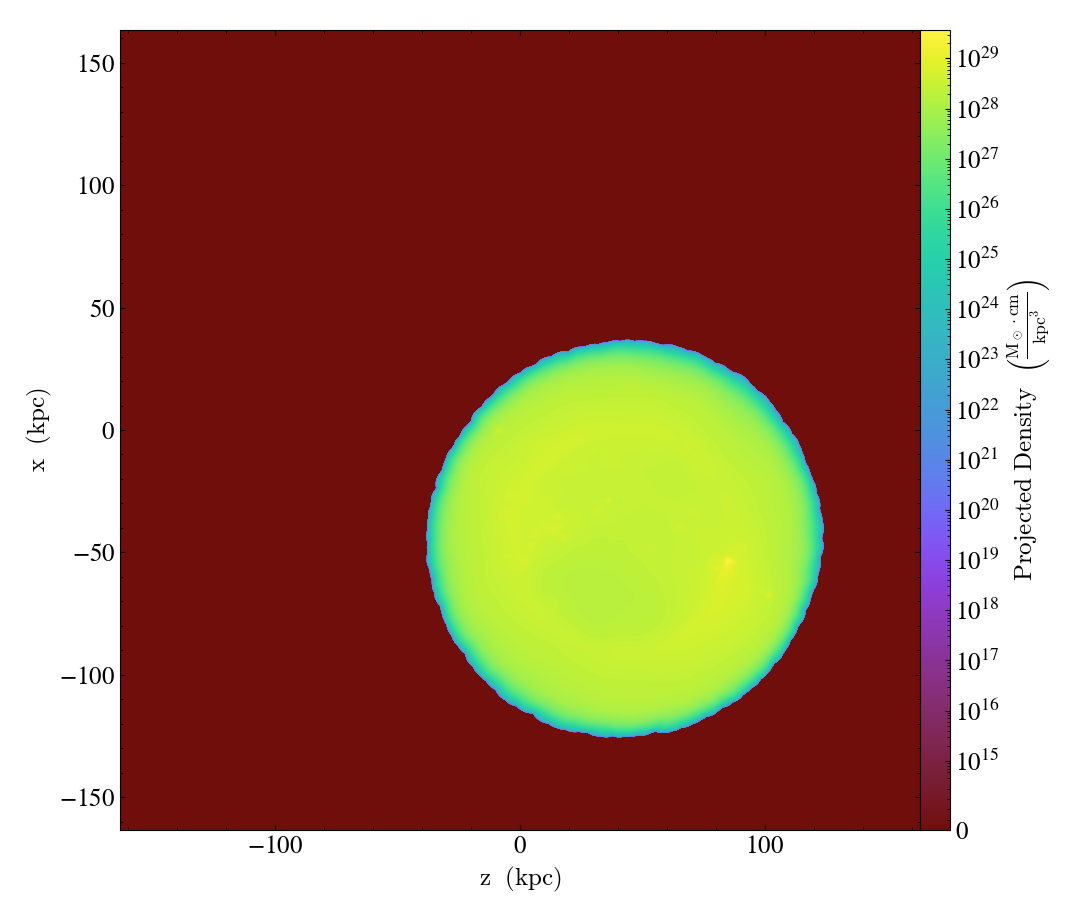

In [8]:
p = yt.ProjectionPlot(ds, "y", ("PartType0", "Density"))
v, c = ds.find_max(("PartType0", "Masses"))
p.set_center((c[2], c[0]))
p.zoom(80)
p.set_unit(("PartType0", "Density"), "cm*Msun/kpc**3")
p.show()

yt : [INFO     ] 2024-08-23 20:41:30,907 xlim = 18182.568867 18564.935039
yt : [INFO     ] 2024-08-23 20:41:30,908 ylim = 12062.806172 12445.172344
yt : [INFO     ] 2024-08-23 20:41:30,909 xlim = 18182.568867 18564.935039
yt : [INFO     ] 2024-08-23 20:41:30,910 ylim = 12062.806172 12445.172344
yt : [INFO     ] 2024-08-23 20:41:30,913 Making a fixed resolution buffer of (('PartType0', 'temperature')) 800 by 800



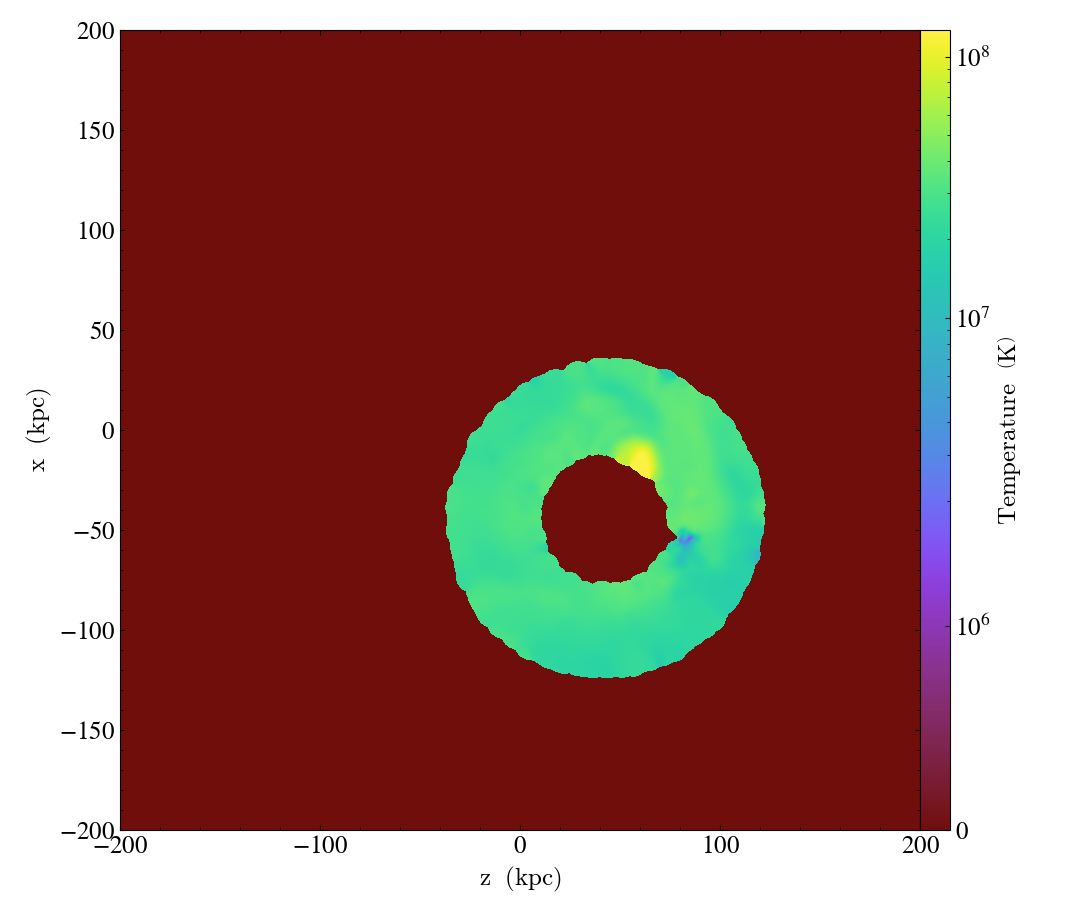

In [97]:
sl = yt.SlicePlot(ds, "y", ("PartType0", "temperature"),\
                  width=(400, "kpc"),\
                 center=((c[0], c[1], c[2])))
sl.set_unit(("PartType0", "temperature"), "K")
sl.show()

yt : [INFO     ] 2024-08-24 19:21:59,885 xlim = 17991.385781 18756.118125
yt : [INFO     ] 2024-08-24 19:21:59,887 ylim = 11871.623086 12636.355430
yt : [INFO     ] 2024-08-24 19:21:59,889 xlim = 17991.385781 18756.118125
yt : [INFO     ] 2024-08-24 19:21:59,890 ylim = 11871.623086 12636.355430
yt : [INFO     ] 2024-08-24 19:21:59,894 Making a fixed resolution buffer of (('PartType0', 'Dust_Masses')) 800 by 800



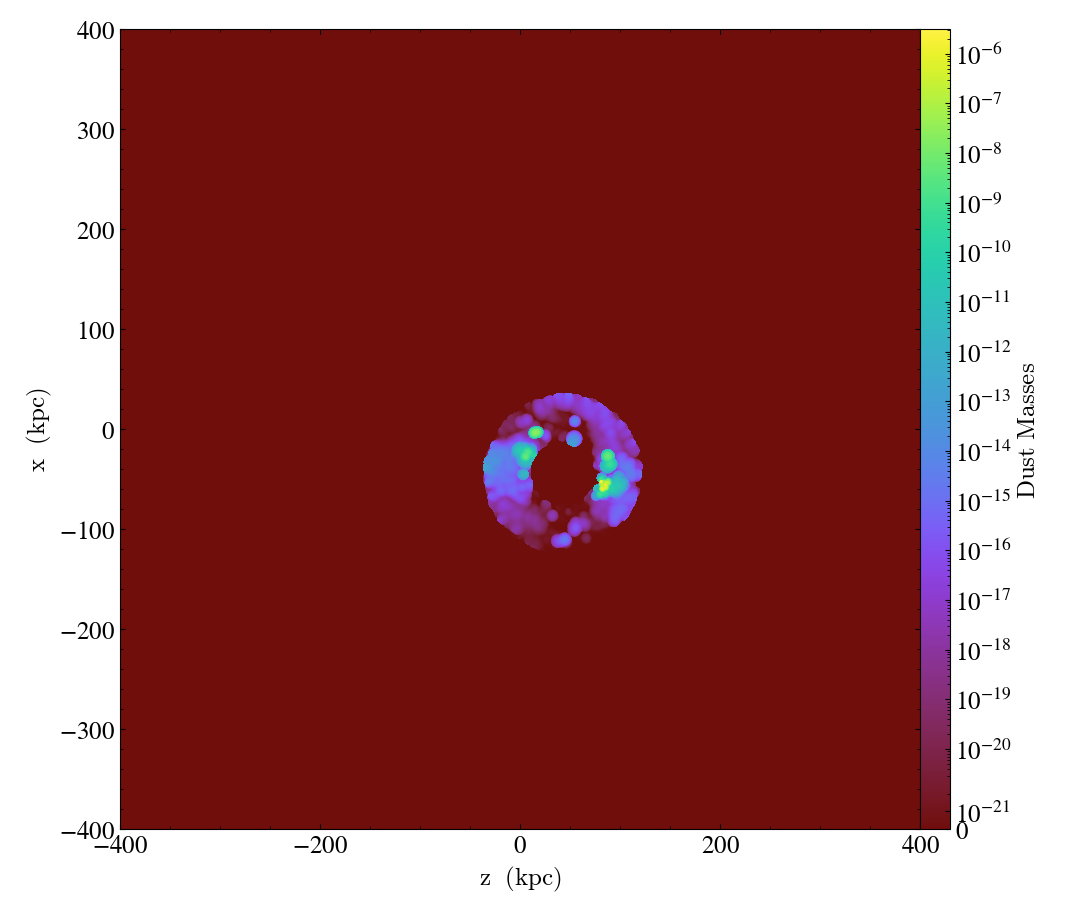

In [35]:
# Create a SlicePlot using the new field
sl = yt.SlicePlot(ds, "y", ("PartType0", "Dust_Masses"),
                  width=(800, "kpc"),
                  center=(c[0], c[1], c[2]))

# Display the plot
sl.show()


yt : [INFO     ] 2024-08-23 19:59:58,882 xlim = 18378.097367 18454.570602
yt : [INFO     ] 2024-08-23 19:59:58,882 ylim = 12174.395219 12250.868453
yt : [INFO     ] 2024-08-23 19:59:58,882 xlim = 18378.097367 18454.570602
yt : [INFO     ] 2024-08-23 19:59:58,883 ylim = 12174.395219 12250.868453
yt : [INFO     ] 2024-08-23 19:59:58,883 Making a fixed resolution buffer of (('PartType0', 'velocity_z')) 800 by 800



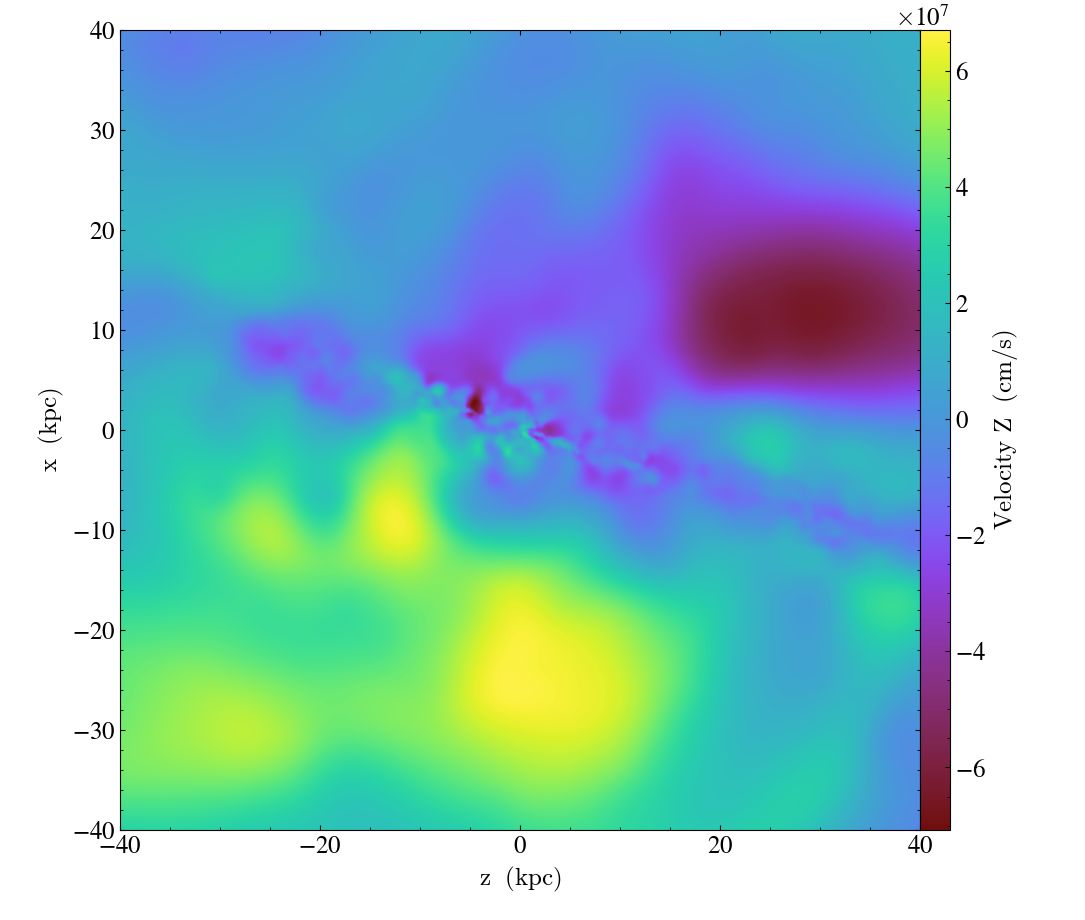

yt : [INFO     ] 2024-08-23 19:59:59,949 xlim = 18378.097367 18454.570602
yt : [INFO     ] 2024-08-23 19:59:59,949 ylim = 12174.395219 12250.868453
yt : [INFO     ] 2024-08-23 19:59:59,950 xlim = 18378.097367 18454.570602
yt : [INFO     ] 2024-08-23 19:59:59,950 ylim = 12174.395219 12250.868453
yt : [INFO     ] 2024-08-23 19:59:59,951 Making a fixed resolution buffer of (('PartType0', 'velocity_x')) 800 by 800



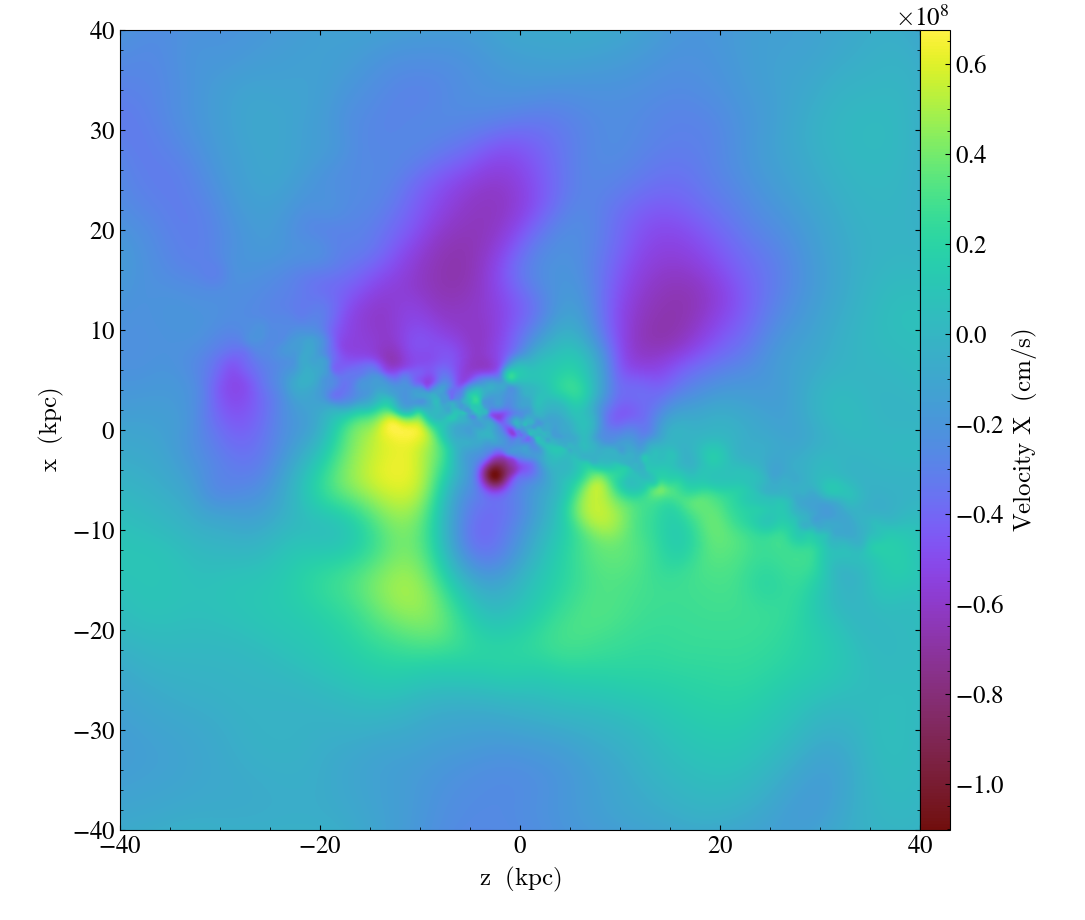

In [82]:
sl = yt.SlicePlot(ds, "y", ("PartType0", "velocity_z"),\
                  width=(80, "kpc"),\
                 center=((c[0], c[1], c[2])))
#sl.set_unit(("PartType0", "Dust_Masses"), "Msun")
sl.show()

sl = yt.SlicePlot(ds, "y", ("PartType0", "velocity_x"),\
                  width=(80, "kpc"),\
                 center=((c[0], c[1], c[2])))
#sl.set_unit(("PartType0", "Dust_Masses"), "Msun")
sl.show()

yt : [INFO     ] 2024-08-23 20:15:44,421 xlim = 18378.097367 18454.570602
yt : [INFO     ] 2024-08-23 20:15:44,422 ylim = 12174.395219 12250.868453
yt : [INFO     ] 2024-08-23 20:15:44,422 xlim = 18378.097367 18454.570602
yt : [INFO     ] 2024-08-23 20:15:44,423 ylim = 12174.395219 12250.868453
yt : [INFO     ] 2024-08-23 20:15:44,423 Making a fixed resolution buffer of (('PartType0', 'Sigma')) 800 by 800



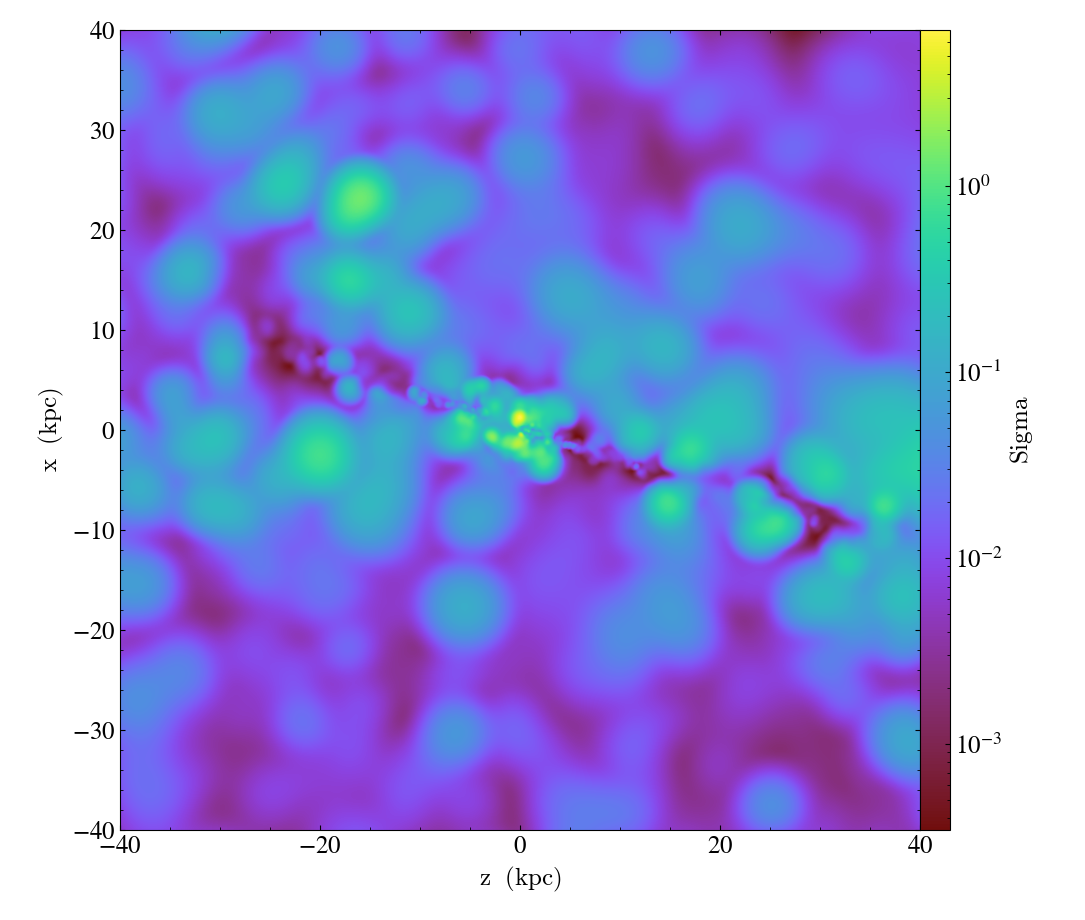

In [86]:
sl = yt.SlicePlot(ds, "y", ("PartType0", "Sigma"),\
                  width=(80, "kpc"),\
                 center=((c[0], c[1], c[2])))
#sl.set_unit(("PartType0", "Dust_Masses"), "Msun")
sl.show()

yt : [INFO     ] 2024-08-23 19:54:03,852 xlim = 18378.097367 18454.570602
yt : [INFO     ] 2024-08-23 19:54:03,852 ylim = 12174.395219 12250.868453
yt : [INFO     ] 2024-08-23 19:54:03,853 xlim = 18378.097367 18454.570602
yt : [INFO     ] 2024-08-23 19:54:03,853 ylim = 12174.395219 12250.868453
yt : [INFO     ] 2024-08-23 19:54:03,854 Making a fixed resolution buffer of (('PartType0', 'NeutralHydrogenAbundance')) 800 by 800



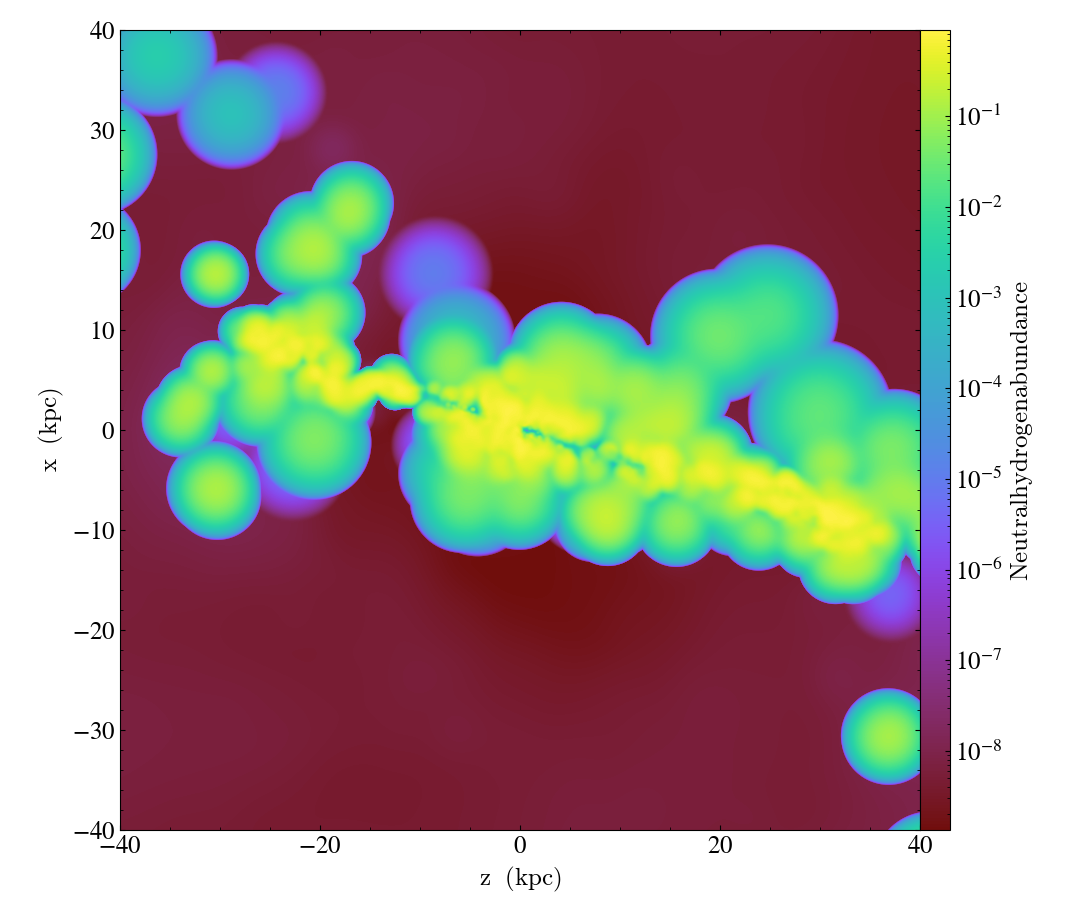

In [74]:
sl = yt.SlicePlot(ds, "y", ("PartType0", "NeutralHydrogenAbundance"),\
                  width=(80, "kpc"),\
                 center=((c[0], c[1], c[2])))
#sl.set_unit(("PartType0", "Dust_Masses"), "Msun")
sl.show()

Interpolating SPH field ('PartType0', 'Masses'): 400000it [00:00, 6728919.91it/s]
yt : [INFO     ] 2024-08-23 18:21:16,296 Saving field data to yt dataset: particles_within_aperture_covering_grid.h5.
yt : [INFO     ] 2024-08-23 18:21:18,944 Parameters: current_time              = 2.968791388457766e+17 s
yt : [INFO     ] 2024-08-23 18:21:18,944 Parameters: domain_dimensions         = [256 256 256] dimensionless
yt : [INFO     ] 2024-08-23 18:21:18,945 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2024-08-23 18:21:18,945 Parameters: domain_right_edge         = [25000. 25000. 25000.] code_length
yt : [INFO     ] 2024-08-23 18:21:18,945 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-08-23 18:21:18,945 Parameters: current_redshift          = 0.4057579856290421
yt : [INFO     ] 2024-08-23 18:21:18,946 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-08-23 18:21:18,946 Parameters: omega_matter              = 0.3
yt : [INFO   

g


yt : [INFO     ] 2024-08-23 18:21:20,432 Projection completed
yt : [INFO     ] 2024-08-23 18:21:20,432 xlim = 0.000000 25000.000000
yt : [INFO     ] 2024-08-23 18:21:20,432 ylim = 0.000000 25000.000000
yt : [INFO     ] 2024-08-23 18:21:20,433 xlim = 0.000000 25000.000000
yt : [INFO     ] 2024-08-23 18:21:20,433 ylim = 0.000000 25000.000000
yt : [INFO     ] 2024-08-23 18:21:20,434 Making a fixed resolution buffer of (('grid', 'nbody_mass')) 800 by 800
yt : [INFO     ] 2024-08-23 18:21:20,601 max value is 4.66547e-04 at 12212.6318359375000000 15212.4453125000000000 18416.3339843750000000
yt : [INFO     ] 2024-08-23 18:21:20,602 xlim = 5916.333984 30916.333984
yt : [INFO     ] 2024-08-23 18:21:20,602 ylim = -287.368164 24712.631836
yt : [INFO     ] 2024-08-23 18:21:20,603 Making a fixed resolution buffer of (('grid', 'nbody_mass')) 800 by 800



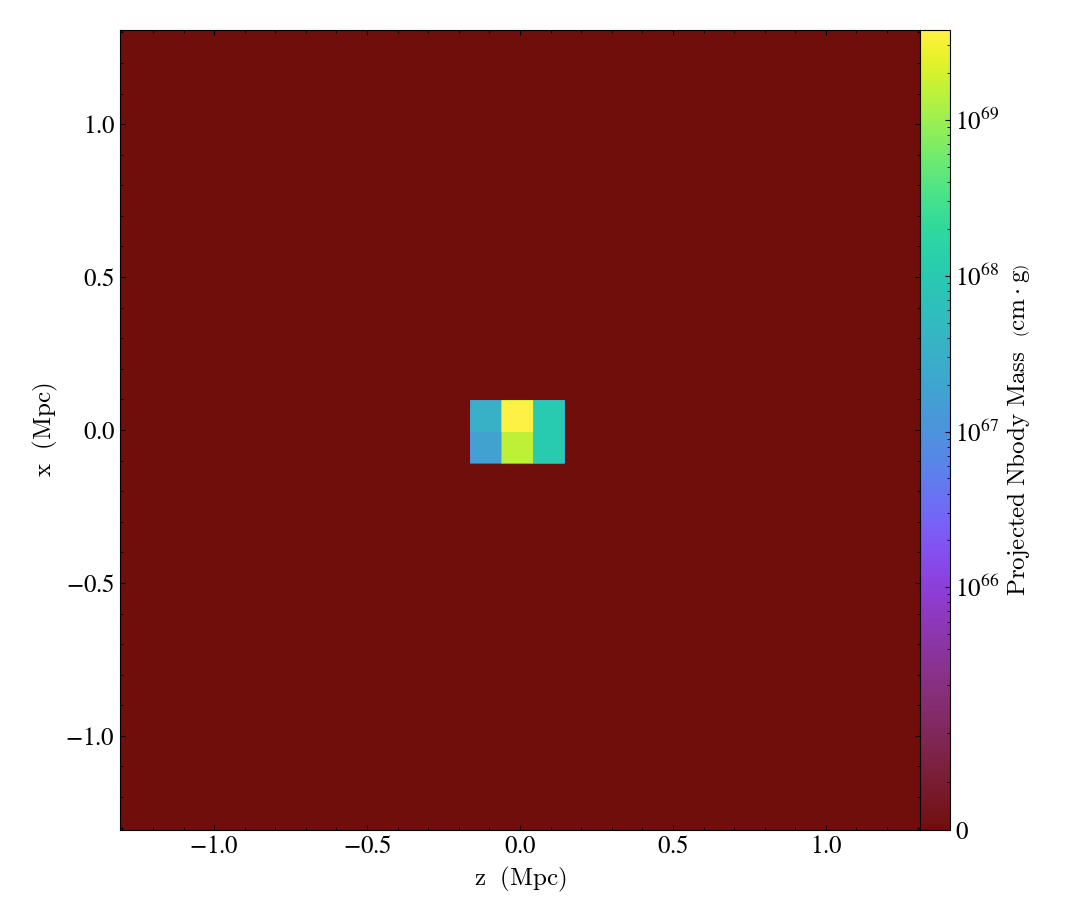

In [6]:
# create a 128^3 covering grid over the entire domain
# Create a 128^3 covering grid over the entire domain

#'/media/lorenzong/Data1/simba_hig_res/snap_m25n512_129.hdf5' 
L = 8
dims = [256, 256, 256]  # Finer grid with higher resolution
# Convert the particle mass to physical units
mass_in_Msun = ds.quan(1.0, "code_mass").in_units("Msun")
cg = ds.covering_grid(level=L, left_edge=ds.domain_left_edge, dims=dims, fields=[('PartType0', 'Masses')])
# Convert the nbody_mass field to physical units (e.g., Msun)
#cg["deposit", "nbody_mass"] = cg["deposit", "nbody_mass"].in_units("Msun")
# Save the covering grid as a new dataset
fn = cg.save_as_dataset(fields=[("deposit", "nbody_mass")])

# Load the newly created grid dataset
ds_grid = yt.load(fn)
print(ds_grid.field_info["grid", "nbody_mass"].units)
# Create a projection plot of the nbody_mass field
p = yt.ProjectionPlot(ds_grid, 'y', ("grid", "nbody_mass"))
v, c = ds.find_max(("PartType0", "Masses"))
p.set_center((c[2], c[0]))
p.zoom(10)
# Show the plot
p.show()

yt : [INFO     ] 2024-08-23 19:46:28,793 xlim = 18320.742441 18511.925527
yt : [INFO     ] 2024-08-23 19:46:28,794 ylim = 12117.040293 12308.223379
yt : [INFO     ] 2024-08-23 19:46:28,796 xlim = 18320.742441 18511.925527
yt : [INFO     ] 2024-08-23 19:46:28,797 ylim = 12117.040293 12308.223379
yt : [INFO     ] 2024-08-23 19:46:28,802 Splatting (('PartType4', 'particle_mass')) onto a 800 by 800 mesh using method 'ngp'



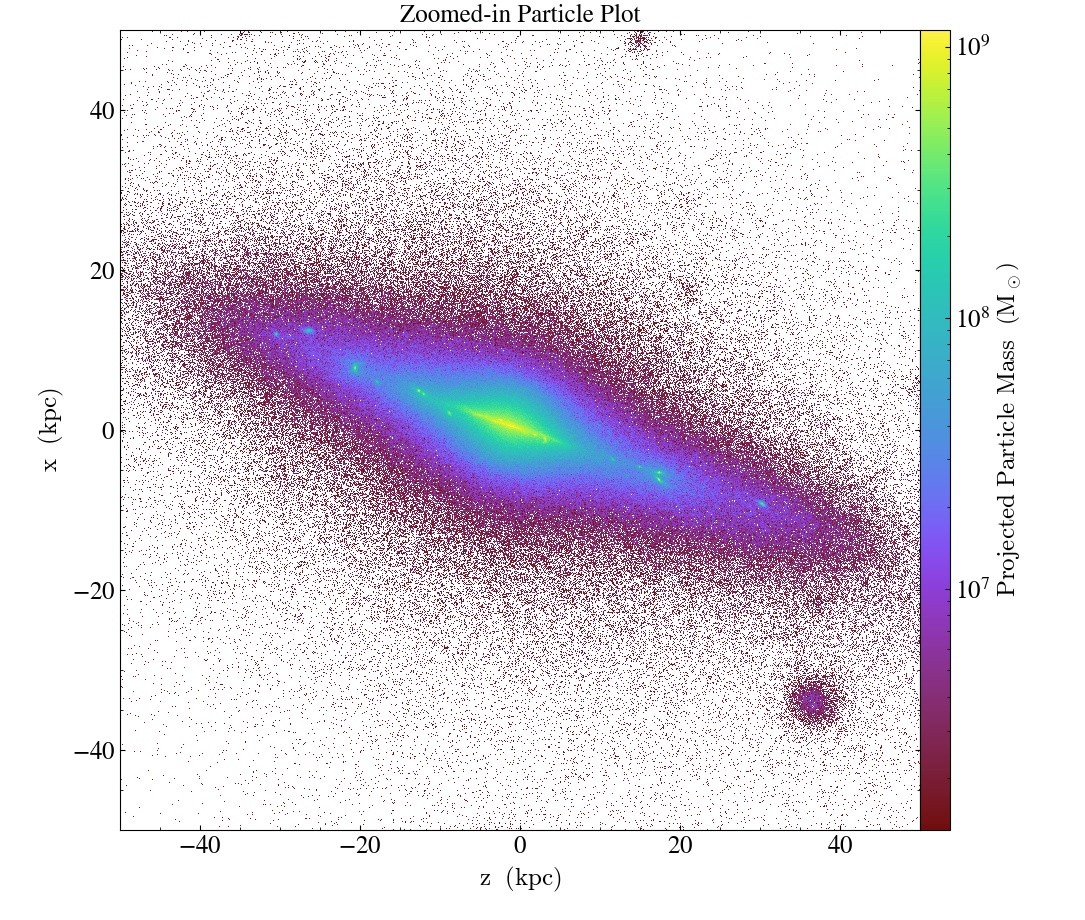

In [61]:
pp = yt.ParticlePlot(
    ds,
    ("PartType4", "particle_position_z"),
    ("PartType4", "particle_position_x"),
    ("PartType4", "particle_mass"),
    center=(c[0], c[1], c[2]),
    width=(200, "kpc"),
)
pp.set_unit(("PartType4", "particle_mass"), "Msun")
pp.annotate_title("Zoomed-in Particle Plot")
pp.zoom(2)
# Display the modified plot
pp.show()

yt : [INFO     ] 2024-08-23 20:46:42,259 xlim = 18134.773096 18612.730811
yt : [INFO     ] 2024-08-23 20:46:42,260 ylim = 12015.010400 12492.968115
yt : [INFO     ] 2024-08-23 20:46:42,261 xlim = 18134.773096 18612.730811
yt : [INFO     ] 2024-08-23 20:46:42,261 ylim = 12015.010400 12492.968115
yt : [INFO     ] 2024-08-23 20:46:42,263 Splatting (('PartType0', 'particle_mass')) onto a 800 by 800 mesh using method 'ngp'



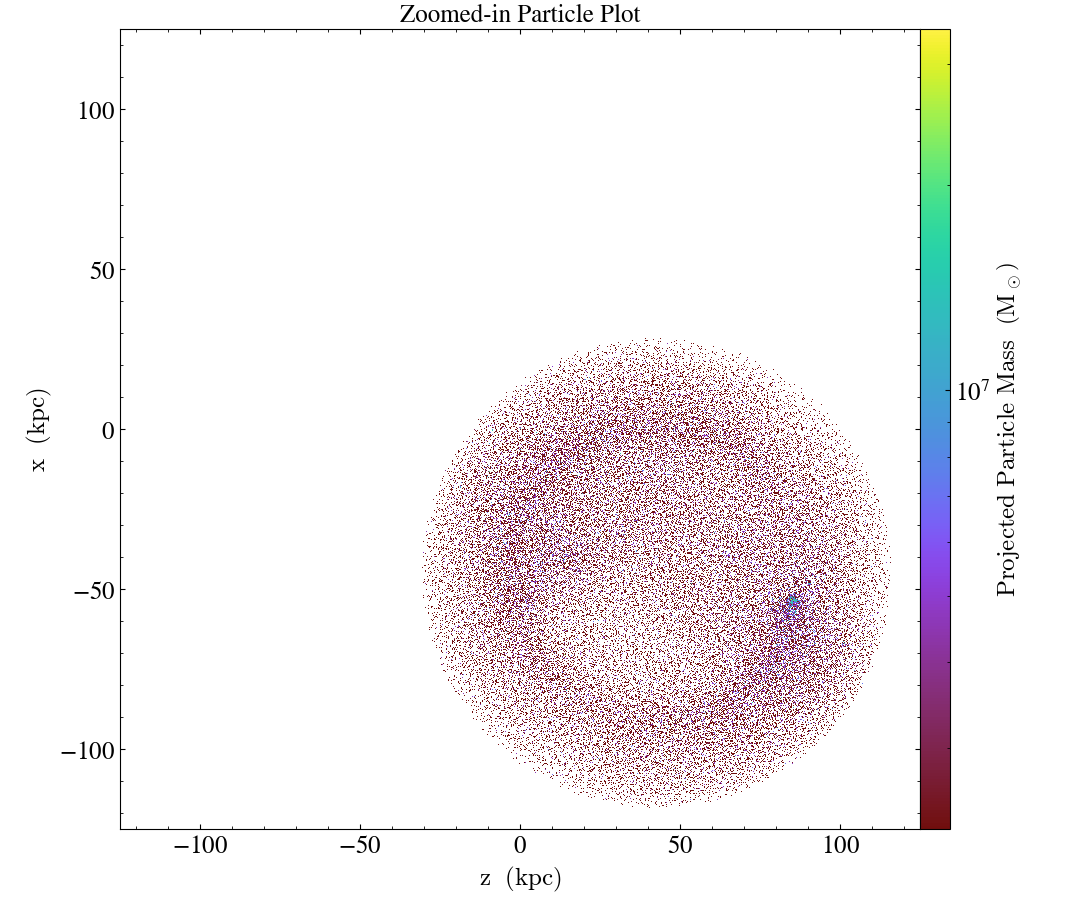

In [107]:
pp = yt.ParticlePlot(
    ds,
    ("PartType0", "particle_position_z"),
    ("PartType0", "particle_position_x"),
    ("PartType0", "particle_mass"),
    center=(c[0], c[1], c[2]),
    width=(500, "kpc"),
)
pp.set_unit(("PartType0", "particle_mass"), "Msun")
pp.annotate_title("Zoomed-in Particle Plot")
pp.zoom(2)
# Display the modified plot
pp.show()

yt : [INFO     ] 2024-08-23 20:46:58,504 xlim = 18278.160410 18469.343496
yt : [INFO     ] 2024-08-23 20:46:58,505 ylim = 12158.397715 12349.580801
yt : [INFO     ] 2024-08-23 20:46:58,507 xlim = 18278.160410 18469.343496
yt : [INFO     ] 2024-08-23 20:46:58,508 ylim = 12158.397715 12349.580801
yt : [INFO     ] 2024-08-23 20:46:58,510 Splatting (('PartType0', 'temperature')) onto a 800 by 800 mesh using method 'ngp'



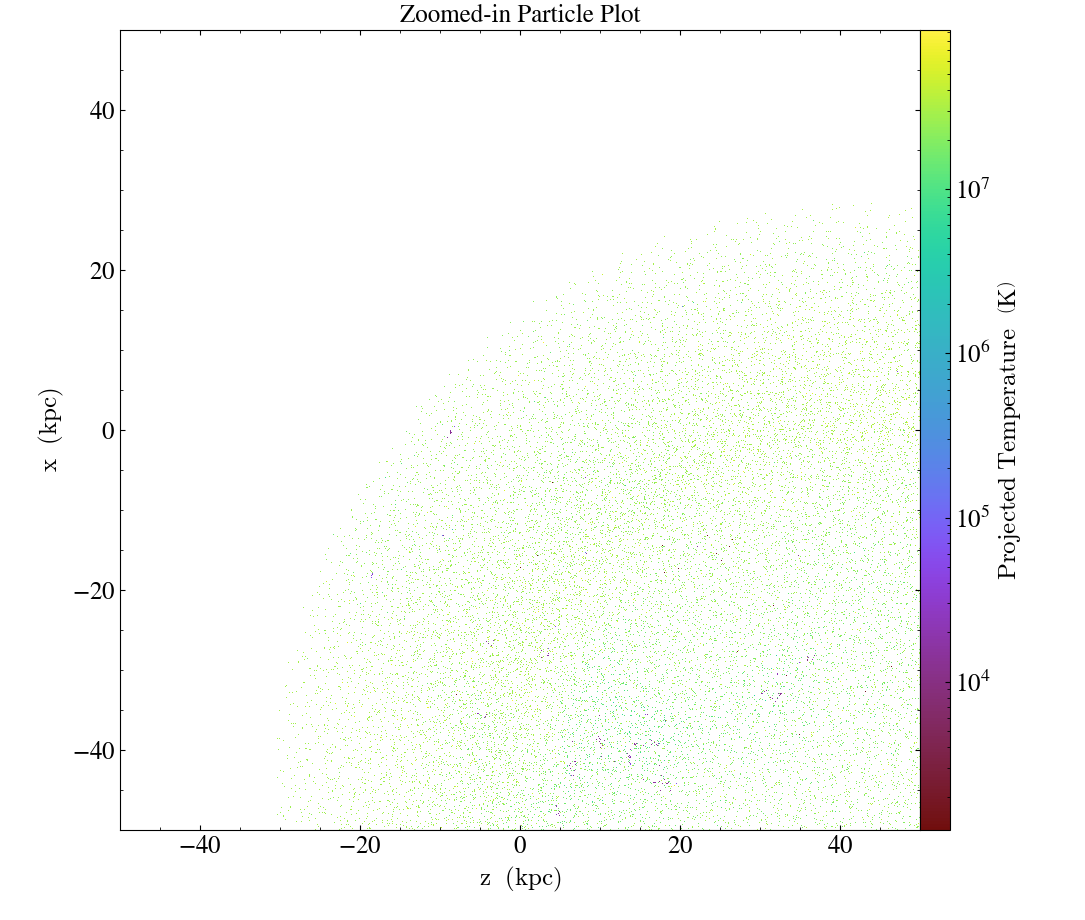

In [108]:
pp = yt.ParticlePlot(
    ds,
    ("PartType0", "particle_position_z"),
    ("PartType0", "particle_position_x"),
    ("PartType0", "temperature"),
    center=(c[0], c[1], c[2]),
    width=(200, "kpc"),
)
pp.set_unit(("PartType0", "temperature"), "K")
pp.annotate_title("Zoomed-in Particle Plot")
pp.zoom(2)
# Display the modified plot
pp.show()

yt : [INFO     ] 2024-08-23 19:49:20,301 xlim = 18320.742441 18511.925527
yt : [INFO     ] 2024-08-23 19:49:20,303 ylim = 12117.040293 12308.223379
yt : [INFO     ] 2024-08-23 19:49:20,305 xlim = 18320.742441 18511.925527
yt : [INFO     ] 2024-08-23 19:49:20,306 ylim = 12117.040293 12308.223379
yt : [INFO     ] 2024-08-23 19:49:20,311 Splatting (('PartType0', 'Dust_Masses')) onto a 800 by 800 mesh using method 'ngp'



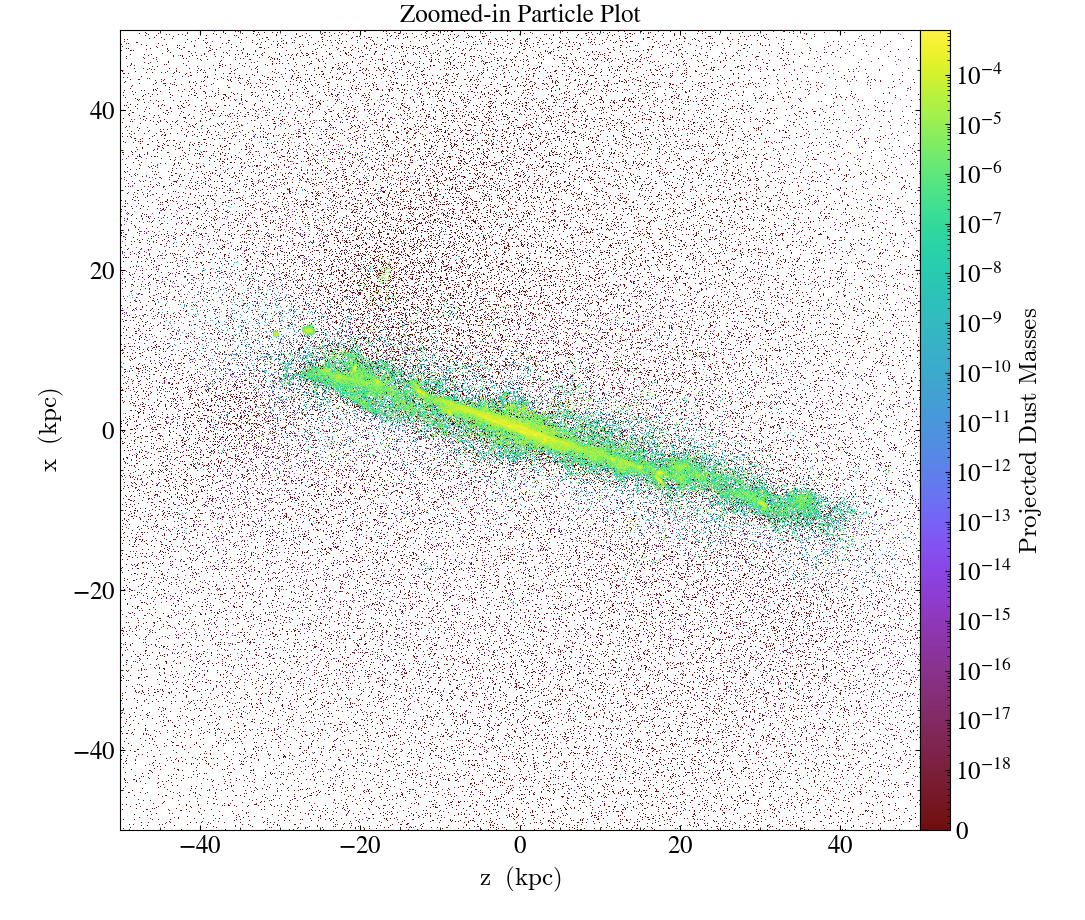

In [65]:
pp = yt.ParticlePlot(
    ds,
    ("PartType0", "particle_position_z"),
    ("PartType0", "particle_position_x"),
    ("PartType0", "Dust_Masses"),
    center=(c[0], c[1], c[2]),
    width=(200, "kpc"),
)
#pp.set_unit(("PartType0", "temperature"), "K")
pp.annotate_title("Zoomed-in Particle Plot")
pp.zoom(2)
# Display the modified plot
pp.show()

In [70]:
print(ds.field_list)

[('PartType0', 'AGS-Softening'), ('PartType0', 'Coordinates'), ('PartType0', 'DelayTime'), ('PartType0', 'Density'), ('PartType0', 'Dust_Masses'), ('PartType0', 'Dust_Metallicity'), ('PartType0', 'ElectronAbundance'), ('PartType0', 'FractionH2'), ('PartType0', 'GrackleHI'), ('PartType0', 'GrackleHII'), ('PartType0', 'GrackleHM'), ('PartType0', 'GrackleHeI'), ('PartType0', 'GrackleHeII'), ('PartType0', 'GrackleHeIII'), ('PartType0', 'HaloID'), ('PartType0', 'ID_Generations'), ('PartType0', 'InternalEnergy'), ('PartType0', 'Masses'), ('PartType0', 'Metallicity_00'), ('PartType0', 'Metallicity_01'), ('PartType0', 'Metallicity_02'), ('PartType0', 'Metallicity_03'), ('PartType0', 'Metallicity_04'), ('PartType0', 'Metallicity_05'), ('PartType0', 'Metallicity_06'), ('PartType0', 'Metallicity_07'), ('PartType0', 'Metallicity_08'), ('PartType0', 'Metallicity_09'), ('PartType0', 'Metallicity_10'), ('PartType0', 'NWindLaunches'), ('PartType0', 'NeutralHydrogenAbundance'), ('PartType0', 'ParticleI